#### J034 Meghna Jayakar Lab 1 

28/7/24

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

In [63]:
df = pd.read_csv('dress_rental_prices.csv')
df

,ID,Name,Brand,Colour,Catagories,Price
0,74416,Runway stripe dress,Stella McCartney,beige,dresses,111
1,73815,Reformation Kourtney Dress,Reformation,beige,dresses,50
2,73801,Ivory Viola bridal dress,Ghost,beige,dresses,75
3,73718,Pasu Dress - Rhino Tusk,Coucoo,beige,dresses,37
4,73605,Ellen,RIXO,beige,dresses,47
...,...,...,...,...,...,...
29992,872,Silk and wool-blend crepe dress yellow,Victoria Beckham,yellow,"dresses, Smart, midi, Short Sleeve, Pencil, Mo...",102
29993,871,La Guardia Matching Set,Faithfull The Brand,yellow,"dresses, Floral, Polka Dot, Loose, Smart Casua...",43
29994,844,One-shoulder ruffled crepe mini dress,Solace London,yellow,"dresses, Vinyl-PVC-Synthetics, Smart, Formal, ...",75
29995,592,Billie Dress,Rebecca Vallance,yellow,"dresses, Cotton-Jersey, Tie-Front, Skinny-Fit,...",42


In [64]:
df.columns = ['ID', 'Name', 'Brand', 'Colour', 'Categories', 'Price']

In [65]:
df.drop(['ID'], axis = 1, inplace = True)

In [66]:
df.nunique()

Name          25585
Brand           931
Colour           20
Categories     5400
Price           295
dtype: int64

In [67]:
df.describe()

,Price
count,29997.000000
mean,61.668800
std,38.138688
min,11.000000
25%,40.000000
50%,51.000000
75%,69.000000
max,793.000000


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29997 entries, 0 to 29996
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        29995 non-null  object
 1   Brand       29997 non-null  object
 2   Colour      29997 non-null  object
 3   Categories  29883 non-null  object
 4   Price       29997 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [69]:
df.isna().sum()

Name            2
Brand           0
Colour          0
Categories    114
Price           0
dtype: int64

In [70]:
imputer = SimpleImputer(strategy = 'most_frequent')
df['Name'] = imputer.fit_transform(df[['Name']])
df['Categories'] = imputer.fit_transform(df[['Categories']])

In [71]:
df.isna().sum()

Name          0
Brand         0
Colour        0
Categories    0
Price         0
dtype: int64

In [72]:
df.drop(['Name', 'Categories'], axis = 1, inplace = True)

In [73]:
df.head()

,Brand,Colour,Price
0,Stella McCartney,beige,111
1,Reformation,beige,50
2,Ghost,beige,75
3,Coucoo,beige,37
4,RIXO,beige,47


In [74]:
df = pd.get_dummies(df, columns = ['Brand', 'Colour'])

#### Splitting in train and test sets

In [76]:
x = df.drop(['Price'], axis = 1)
y = df['Price']

In [77]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [78]:
for _ in [xtrain, xtest, ytrain, ytest]:
    print(_.shape)

(23997, 951)
(6000, 951)
(23997,)
(6000,)


#### Model Creation

In [79]:
model = Sequential([
    Dense(units = 64, input_shape = (951, ), activation = 'relu'), 
    Dense(units = 32, activation = 'relu'),
    Dense(units = 16, activation = 'relu'),
    Dense(units = 1, activation = 'linear')
])

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                60928     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 63553 (248.25 KB)
Trainable params: 63553 (248.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

In [82]:
history = model.fit(xtrain, ytrain, epochs = 10, batch_size = 128)

Epoch 1/10
188/188 [==============================] - 2s 5ms/step - loss: 2915.0603 - mae: 38.5217
Epoch 2/10
188/188 [==============================] - 1s 4ms/step - loss: 1029.3351 - mae: 19.1378
Epoch 3/10
188/188 [==============================] - 1s 6ms/step - loss: 857.4940 - mae: 16.9130
Epoch 4/10
188/188 [==============================] - 1s 6ms/step - loss: 799.5485 - mae: 16.2199
Epoch 5/10
188/188 [==============================] - 1s 5ms/step - loss: 773.6538 - mae: 15.8443
Epoch 6/10
188/188 [==============================] - 1s 6ms/step - loss: 756.6627 - mae: 15.6789
Epoch 7/10
188/188 [==============================] - 1s 5ms/step - loss: 744.3407 - mae: 15.5394
Epoch 8/10
188/188 [==============================] - 1s 5ms/step - loss: 735.0770 - mae: 15.4296
Epoch 9/10
188/188 [==============================] - 1s 5ms/step - loss: 727.0294 - mae: 15.3051
Epoch 10/10
188/188 [==============================] - 1s 5ms/step - loss: 717.6268 - mae: 15.2450


#### Model Evaluation

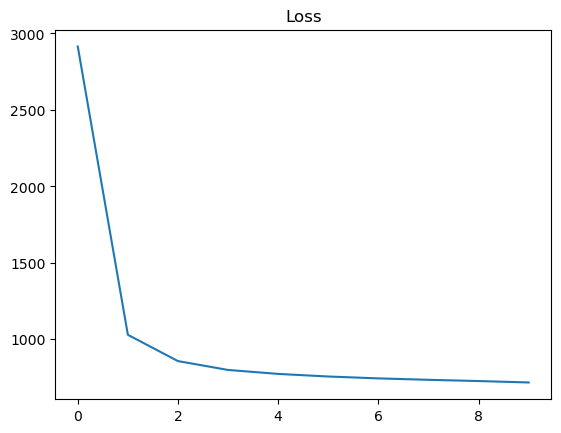

In [83]:
plt.plot(history.history['loss'], label = 'train')
plt.title('Loss')
plt.show()

In [85]:
loss, mae = model.evaluate(xtest, ytest)
print(f'MAE: {mae}')

188/188 [==============================] - 1s 3ms/step - loss: 818.5205 - mae: 15.8450
MAE: 15.844964981079102


#### Prediction

In [86]:
ypreds = model.predict(xtest)
ypreds

188/188 [==============================] - 1s 2ms/step


array([[ 42.10448 ],
       [ 46.147007],
       [ 76.780045],
       ...,
       [ 40.96275 ],
       [ 51.724457],
       [113.58674 ]], dtype=float32)

In [87]:
r2_score(ytest, ypreds)

0.47085032810350713